<a href="https://colab.research.google.com/github/kolla118/5731-Group-6/blob/main/Group%206%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data=pd.read_csv('Final_DataSet_with_all_fields.csv',index_col=[0])

In [ ]:
data.dropna(axis=1, how='all',inplace=True)
data.fillna(0,inplace=True)
data.head()

,id,updated,published,title,summary,author,comment,doi,journal_ref
0,http://arxiv.org/abs/1911.02991v1,2019-11-08T02:23:33Z,2019-11-08T02:23:33Z,Semi-Supervised Method using Gaussian Random F...,Boilerplate removal refers to the problem of...,au:Sumanta Bose,"4 pages, 1 figure, IEEE INDICON conference",0,0
1,http://arxiv.org/abs/1710.08640v1,2017-10-24T07:56:45Z,2017-10-24T07:56:45Z,Optoelectronics of Inverted Type-I CdS/CdSe Co...,Inverted type-I heterostructure core/crown q...,au:Sumanta Bose,Published in AIP Journal of Applied Physics (1...,10.1063/1.4986638,"Sumanta Bose, Weijun Fan, Dao Hua Zhang, Journ..."
2,http://arxiv.org/abs/1711.02527v1,2017-11-05T09:05:09Z,2017-11-05T09:05:09Z,Effect of Size and Shape on Electronic and Opt...,"In this paper, we used the 8-band k$\cdot$p ...",au:Sumanta Bose,Published in Optik - International Journal for...,10.1016/j.ijleo.2017.10.165,0
3,http://arxiv.org/abs/1706.07007v1,2017-06-21T16:55:00Z,2017-06-21T16:55:00Z,Electronic bandstructure and optical gain of l...,Dilute nitride bismide GaNBiAs is a potentia...,au:Sumanta Bose,Accepted in AIP Journal of Applied Physics,10.1063/1.4962214,0
4,http://arxiv.org/abs/1710.05188v2,2018-06-02T04:49:46Z,2017-10-14T14:06:36Z,Signatures of extra dimensions in gravitationa...,In this work we have derived the evolution e...,au:Sumanta Bose,"v2, published, 32 pages, 9 figures",10.1103/PhysRevD.97.104053,"Phys. Rev. D 97, 104053 (2018)"


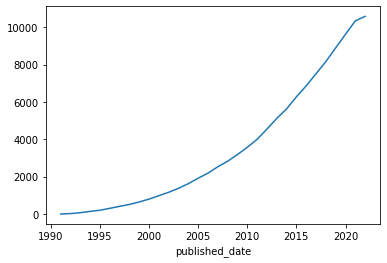

In [ ]:
data['updated'] = data.updated.apply(lambda x : pd.to_datetime(x)) 
data['published'] = data.published.apply(lambda x : pd.to_datetime(x))
data['published_date'] = data.published.apply(lambda x : x.date().year)
data.groupby('published_date').count()['id'].sort_index().cumsum().plot()


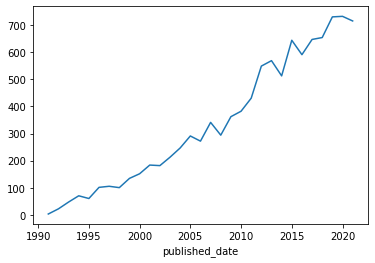

In [ ]:
import datetime as dt
d= dt.date(2021,1,1)
d=2022
data[data['published_date']<d].groupby('published_date').count()['id'].sort_index().plot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


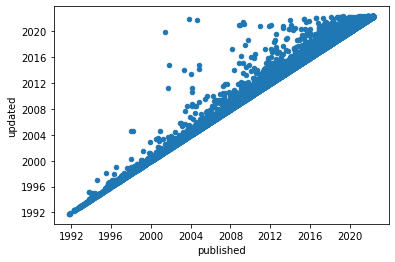

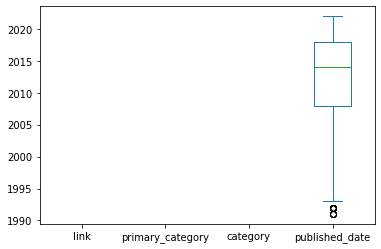

In [ ]:
data.plot.scatter("published",'updated')
data.plot.box('published')

In [ ]:
from collections import Counter, defaultdict
word_bag = " ".join(data.title.apply(lambda t: t.lower()))

Counter(word_bag.split()).most_common(n=10)

[('of', 5150),
 ('the', 3889),
 ('and', 3223),
 ('in', 2896),
 ('a', 2159),
 ('for', 2099),
 ('on', 1405),
 ('with', 1108),
 ('to', 832),
 ('from', 507)]

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stops = [word for word in stopwords.words('english')]
stops += ["=", "->"]
words = filter(lambda w: w not in stops,
               word_bag.split())
top_twenty = Counter(words).most_common(n=20)
top_twenty

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('quantum', 458),
 ('model', 371),
 ('learning', 340),
 ('theory', 332),
 ('using', 304),
 ('bose-einstein', 296),
 ('bose', 262),
 ('systems', 241),
 ('field', 234),
 ('models', 227),
 ('networks', 224),
 ('phase', 190),
 ('analysis', 189),
 ('new', 173),
 ('gas', 171),
 ('data', 168),
 ('random', 167),
 ('deep', 164),
 ('system', 157),
 ('lattice', 156)]

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
stop_words=set(nltk.corpus.stopwords.words('english'))
def clean_text(headline):
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(headline)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text
data['cleaned_text']=data['summary'].apply(clean_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data.head()

,id,updated,published,title,summary,author,comment,link,primary_category,category,doi,journal_ref,published_date,cleaned_text
0,http://arxiv.org/abs/1911.02991v1,2019-11-08 02:23:33+00:00,2019-11-08 02:23:33+00:00,Semi-Supervised Method using Gaussian Random F...,Boilerplate removal refers to the problem of...,au:Sumanta Bose,"4 pages, 1 figure, IEEE INDICON conference",NaN,NaN,NaN,NaN,NaN,2019,Boilerplate removal refers problem removing no...
1,http://arxiv.org/abs/1710.08640v1,2017-10-24 07:56:45+00:00,2017-10-24 07:56:45+00:00,Optoelectronics of Inverted Type-I CdS/CdSe Co...,Inverted type-I heterostructure core/crown q...,au:Sumanta Bose,Published in AIP Journal of Applied Physics (1...,NaN,NaN,NaN,10.1063/1.4986638,"Sumanta Bose, Weijun Fan, Dao Hua Zhang, Journ...",2017,Inverted type-I heterostructure core/crown qua...
2,http://arxiv.org/abs/1711.02527v1,2017-11-05 09:05:09+00:00,2017-11-05 09:05:09+00:00,Effect of Size and Shape on Electronic and Opt...,"In this paper, we used the 8-band k$\cdot$p ...",au:Sumanta Bose,Published in Optik - International Journal for...,NaN,NaN,NaN,10.1016/j.ijleo.2017.10.165,NaN,2017,paper used 8-band \cdot model valence force fi...
3,http://arxiv.org/abs/1706.07007v1,2017-06-21 16:55:00+00:00,2017-06-21 16:55:00+00:00,Electronic bandstructure and optical gain of l...,Dilute nitride bismide GaNBiAs is a potentia...,au:Sumanta Bose,Accepted in AIP Journal of Applied Physics,NaN,NaN,NaN,10.1063/1.4962214,NaN,2017,Dilute nitride bismide GaNBiAs potential semic...
4,http://arxiv.org/abs/1710.05188v2,2018-06-02 04:49:46+00:00,2017-10-14 14:06:36+00:00,Signatures of extra dimensions in gravitationa...,In this work we have derived the evolution e...,au:Sumanta Bose,"v2, published, 32 pages, 9 figures",NaN,NaN,NaN,10.1103/PhysRevD.97.104053,"Phys. Rev. D 97, 104053 (2018)",2017,work derived evolution equation gravitational ...


In [ ]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(data['cleaned_text'])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model=LatentDirichletAllocation(n_components=10,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

In [ ]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  1.6133232275854166 %
Topic  1 :  1.6133070509310212 %
Topic  2 :  1.613463757683244 %
Topic  3 :  1.6134668732587485 %
Topic  4 :  1.6134513459612216 %
Topic  5 :  1.613538633922312 %
Topic  6 :  1.6132722776314077 %
Topic  7 :  55.3569142937936 %
Topic  8 :  31.73586222535026 %
Topic  9 :  1.6134003138827762 %


In [ ]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
            print("\n")

Topic 0: 
mathcal 

depth 

beam 

tau 

laser 

vortex 

word 

frequency 

text 

optical 

Topic 1: 
dark 

matter 

disk 

universe 

hole 

black 

neutrino 

cosmological 

solar 

cosmic 

Topic 2: 
temperature 

magnetic 

phase 

spin 

electron 

field 

transition 

energy 

effect 

lattice 

Topic 3: 
model 

energy 

particle 

quantum 

mass 

state 

decay 

collision 

quark 

time 

Topic 4: 
star 

abundance 

dust 

mass 

stellar 

giant 

ray 

galaxy 

planet 

emission 

Topic 5: 
group 

algebra 

space 

theory 

field 

category 

give 

prove 

theorem 

show 

Topic 6: 
string 

inflation 

neutron 

radius 

search 

dimension 

star 

mode 

theory 

pair 

Topic 7: 
graph 

problem 

model 

time 

algorithm 

random 

function 

method 

result 

paper 

Topic 8: 
network 

model 

data 

learning 

approach 

task 

performance 

based 

method 

neural 

Topic 9: 
paper 

author 

development 

review 

language 

mathematical 

recent 

proof 

conce

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 
data1 = data.summary.values.tolist()
data_words = list(sent_to_words(data1))
print(data_words[:1])



[['boilerplate', 'removal', 'refers', 'to', 'the', 'problem', 'of', 'removing', 'noisy', 'content', 'from', 'webpage', 'such', 'as', 'ads', 'and', 'extracting', 'relevant', 'content', 'that', 'can', 'be', 'used', 'by', 'various', 'services', 'this', 'can', 'be', 'useful', 'in', 'several', 'features', 'in', 'web', 'browsers', 'such', 'as', 'ad', 'blocking', 'accessibility', 'tools', 'such', 'as', 'read', 'out', 'loud', 'translation', 'summarization', 'etc', 'in', 'order', 'to', 'create', 'training', 'dataset', 'to', 'train', 'model', 'for', 'boilerplate', 'detection', 'and', 'removal', 'labeling', 'or', 'tagging', 'webpage', 'data', 'manually', 'can', 'be', 'tedious', 'and', 'time', 'consuming', 'hence', 'semi', 'supervised', 'model', 'in', 'which', 'some', 'of', 'the', 'webpage', 'elements', 'are', 'labeled', 'manually', 'and', 'labels', 'for', 'others', 'are', 'inferred', 'based', 'on', 'some', 'parameters', 'can', 'be', 'useful', 'in', 'this', 'paper', 'we', 'present', 'solution', 'f

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])

    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words) 

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

In [ ]:
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

[(0,
  '0.039*"non" + 0.037*"topological" + 0.034*"spin" + 0.028*"map" + '
  '0.025*"layer" + 0.024*"ring" + 0.020*"form" + 0.017*"description" + '
  '0.015*"suggest" + 0.014*"skyrmion"'),
 (1,
  '0.046*"network" + 0.017*"base" + 0.016*"control" + 0.015*"technique" + '
  '0.015*"graph" + 0.013*"software" + 0.012*"collision" + 0.012*"domain" + '
  '0.010*"tool" + 0.010*"problem"'),
 (2,
  '0.031*"model" + 0.025*"result" + 0.018*"system" + 0.016*"approach" + '
  '0.015*"study" + 0.015*"time" + 0.013*"method" + 0.012*"order" + '
  '0.012*"present" + 0.011*"property"'),
 (3,
  '0.053*"datum" + 0.021*"perform" + 0.019*"establish" + 0.018*"simulation" + '
  '0.016*"light" + 0.015*"object" + 0.015*"characterize" + 0.014*"noise" + '
  '0.012*"recently" + 0.011*"thus"'),
 (4,
  '0.018*"effect" + 0.015*"existence" + 0.014*"evolution" + '
  '0.013*"furthermore" + 0.013*"propose" + 0.012*"depend" + 0.012*"density" + '
  '0.012*"analysis" + 0.012*"flow" + 0.012*"show"'),
 (5,
  '0.027*"sequence" + 

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.5044,"network, base, control, technique, graph, soft...","[boilerplate, removal, refer, problem, remove,..."
1,1,7.0,0.2818,"process, function, type, base, power, growth, ...","[invert, type, heterostructure, core, crown, q..."
2,2,2.0,0.7107,"model, result, system, approach, study, time, ...","[band, model, field, consideration, investigat..."
3,3,2.0,0.3794,"model, result, system, approach, study, time, ...","[potential, semiconductor, alloy, application,..."
4,4,4.0,0.4308,"effect, existence, evolution, furthermore, pro...","[work, derive, evolution, equation, gravitatio..."
5,5,2.0,0.8088,"model, result, system, approach, study, time, ...","[building, work, develop, framework, apply, ca..."
6,6,6.0,0.7901,"state, value, temperature, scale, current, tra...","[analysis, similar, imry, wortis, show, appare..."
7,7,2.0,0.7724,"model, result, system, approach, study, time, ...","[general, misconception, regard, velocity, mea..."
8,8,2.0,0.5514,"model, result, system, approach, study, time, ...","[neutrino, flavor, oscillation, study, class, ..."
9,9,4.0,0.5513,"effect, existence, evolution, furthermore, pro...","[hydrodynamic, behaviour, perfect, fluid, orbi..."


In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.6715,"non, topological, spin, map, layer, ring, form...","[paper, construct, gluing, map, cobordism, map..."
1,1.0,0.8200,"network, base, control, technique, graph, soft...","[introductory, paper, colorability, problem]"
2,2.0,0.8200,"model, result, system, approach, study, time, ...","[present, several, result, include]"
3,3.0,0.8500,"datum, perform, establish, simulation, light, ...","[proceeding, fifth, conference, uncertainty, h..."
4,4.0,0.5798,"effect, existence, evolution, furthermore, pro...","[open_question, extract, understand, new, phys..."
5,5.0,0.8837,"sequence, dust, image, yield, vertex, multiple...","[nous, construison, pour, tout, espace, dan, r..."
6,6.0,0.7901,"state, value, temperature, scale, current, tra...","[analysis, similar, imry, wortis, show, appare..."
7,7.0,0.8200,"process, function, type, base, power, growth, ...","[project, intent, proof, assistant]"
8,8.0,0.7750,"solution, operator, give, theory, class, repre...","[article, algebra, twist]"
9,9.0,0.7750,"show, space, equation, ideal, field, problem, ...","[ideal, gotzmann, polynomial_re]"


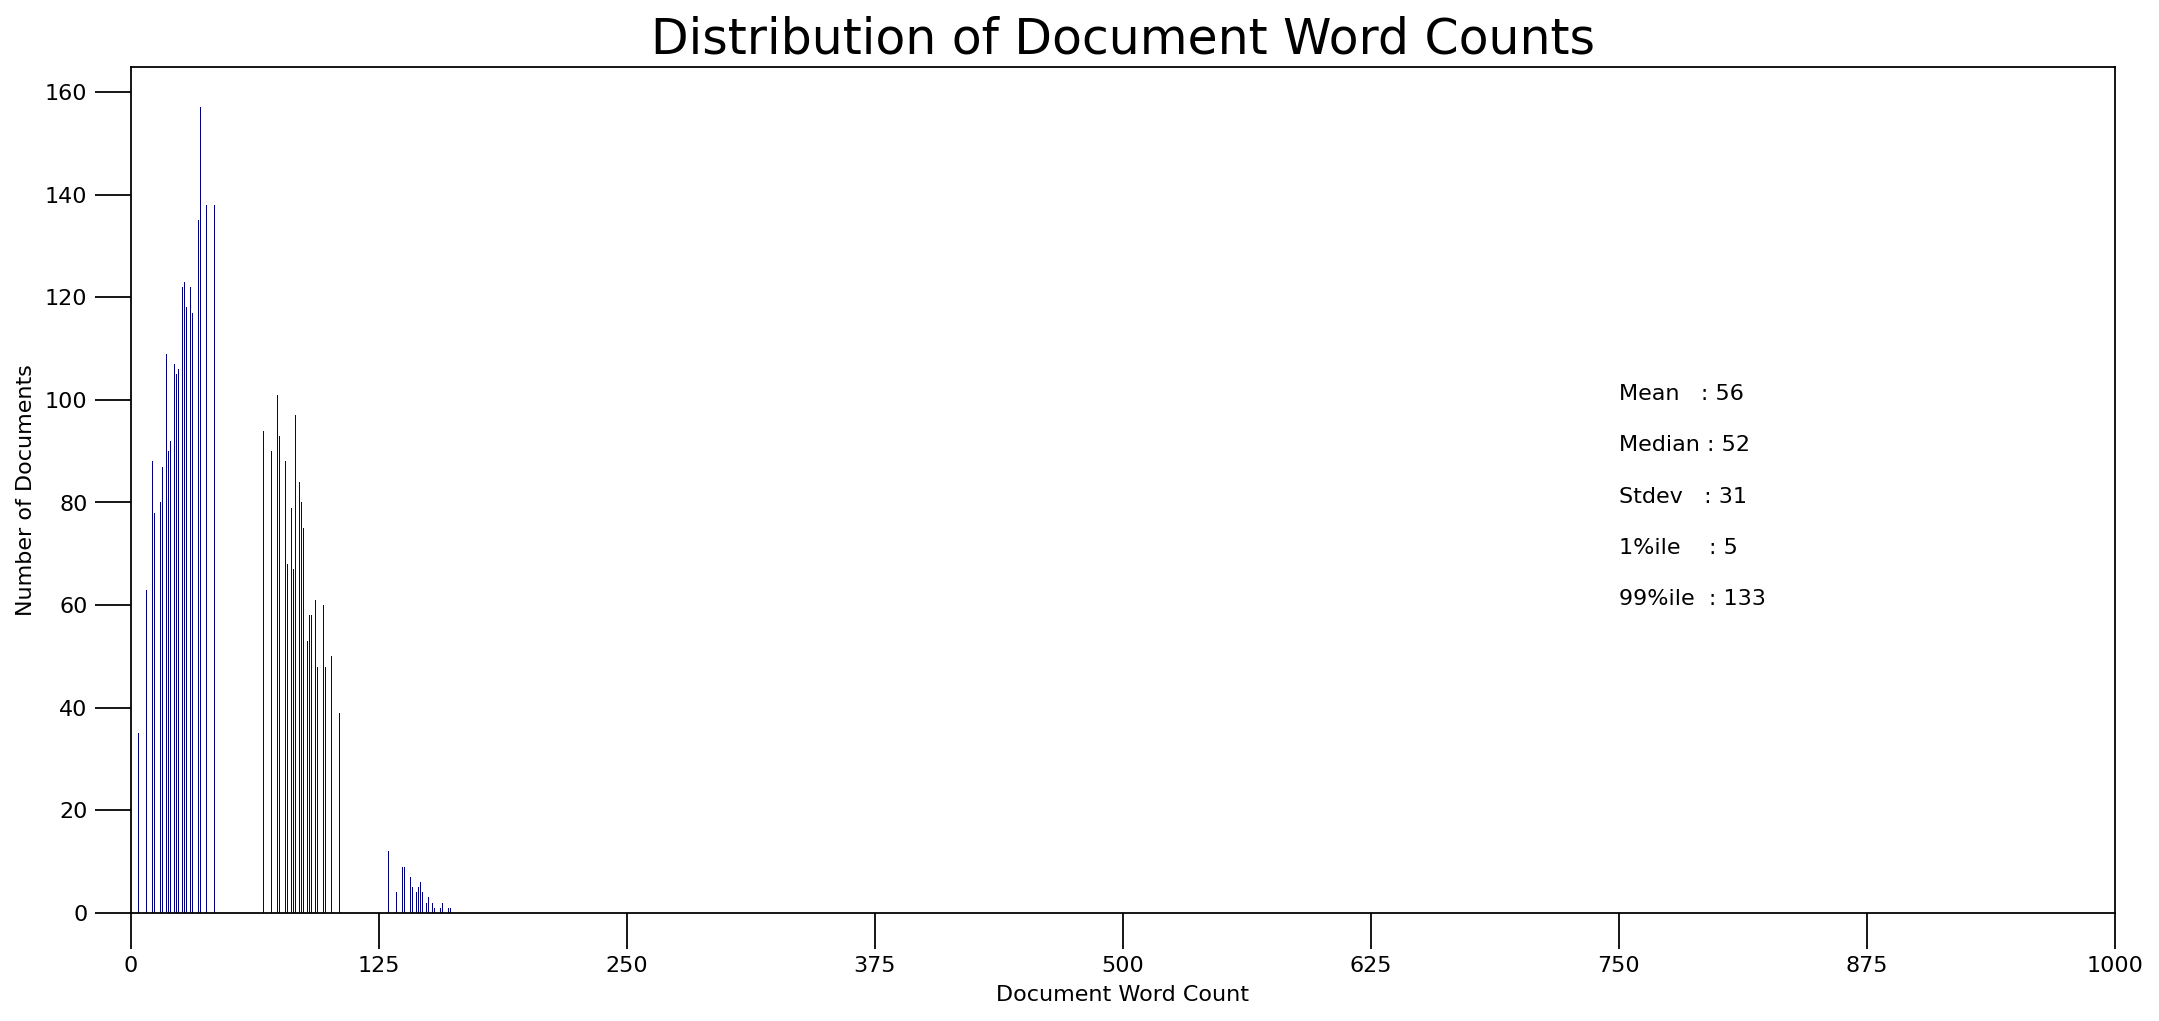

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

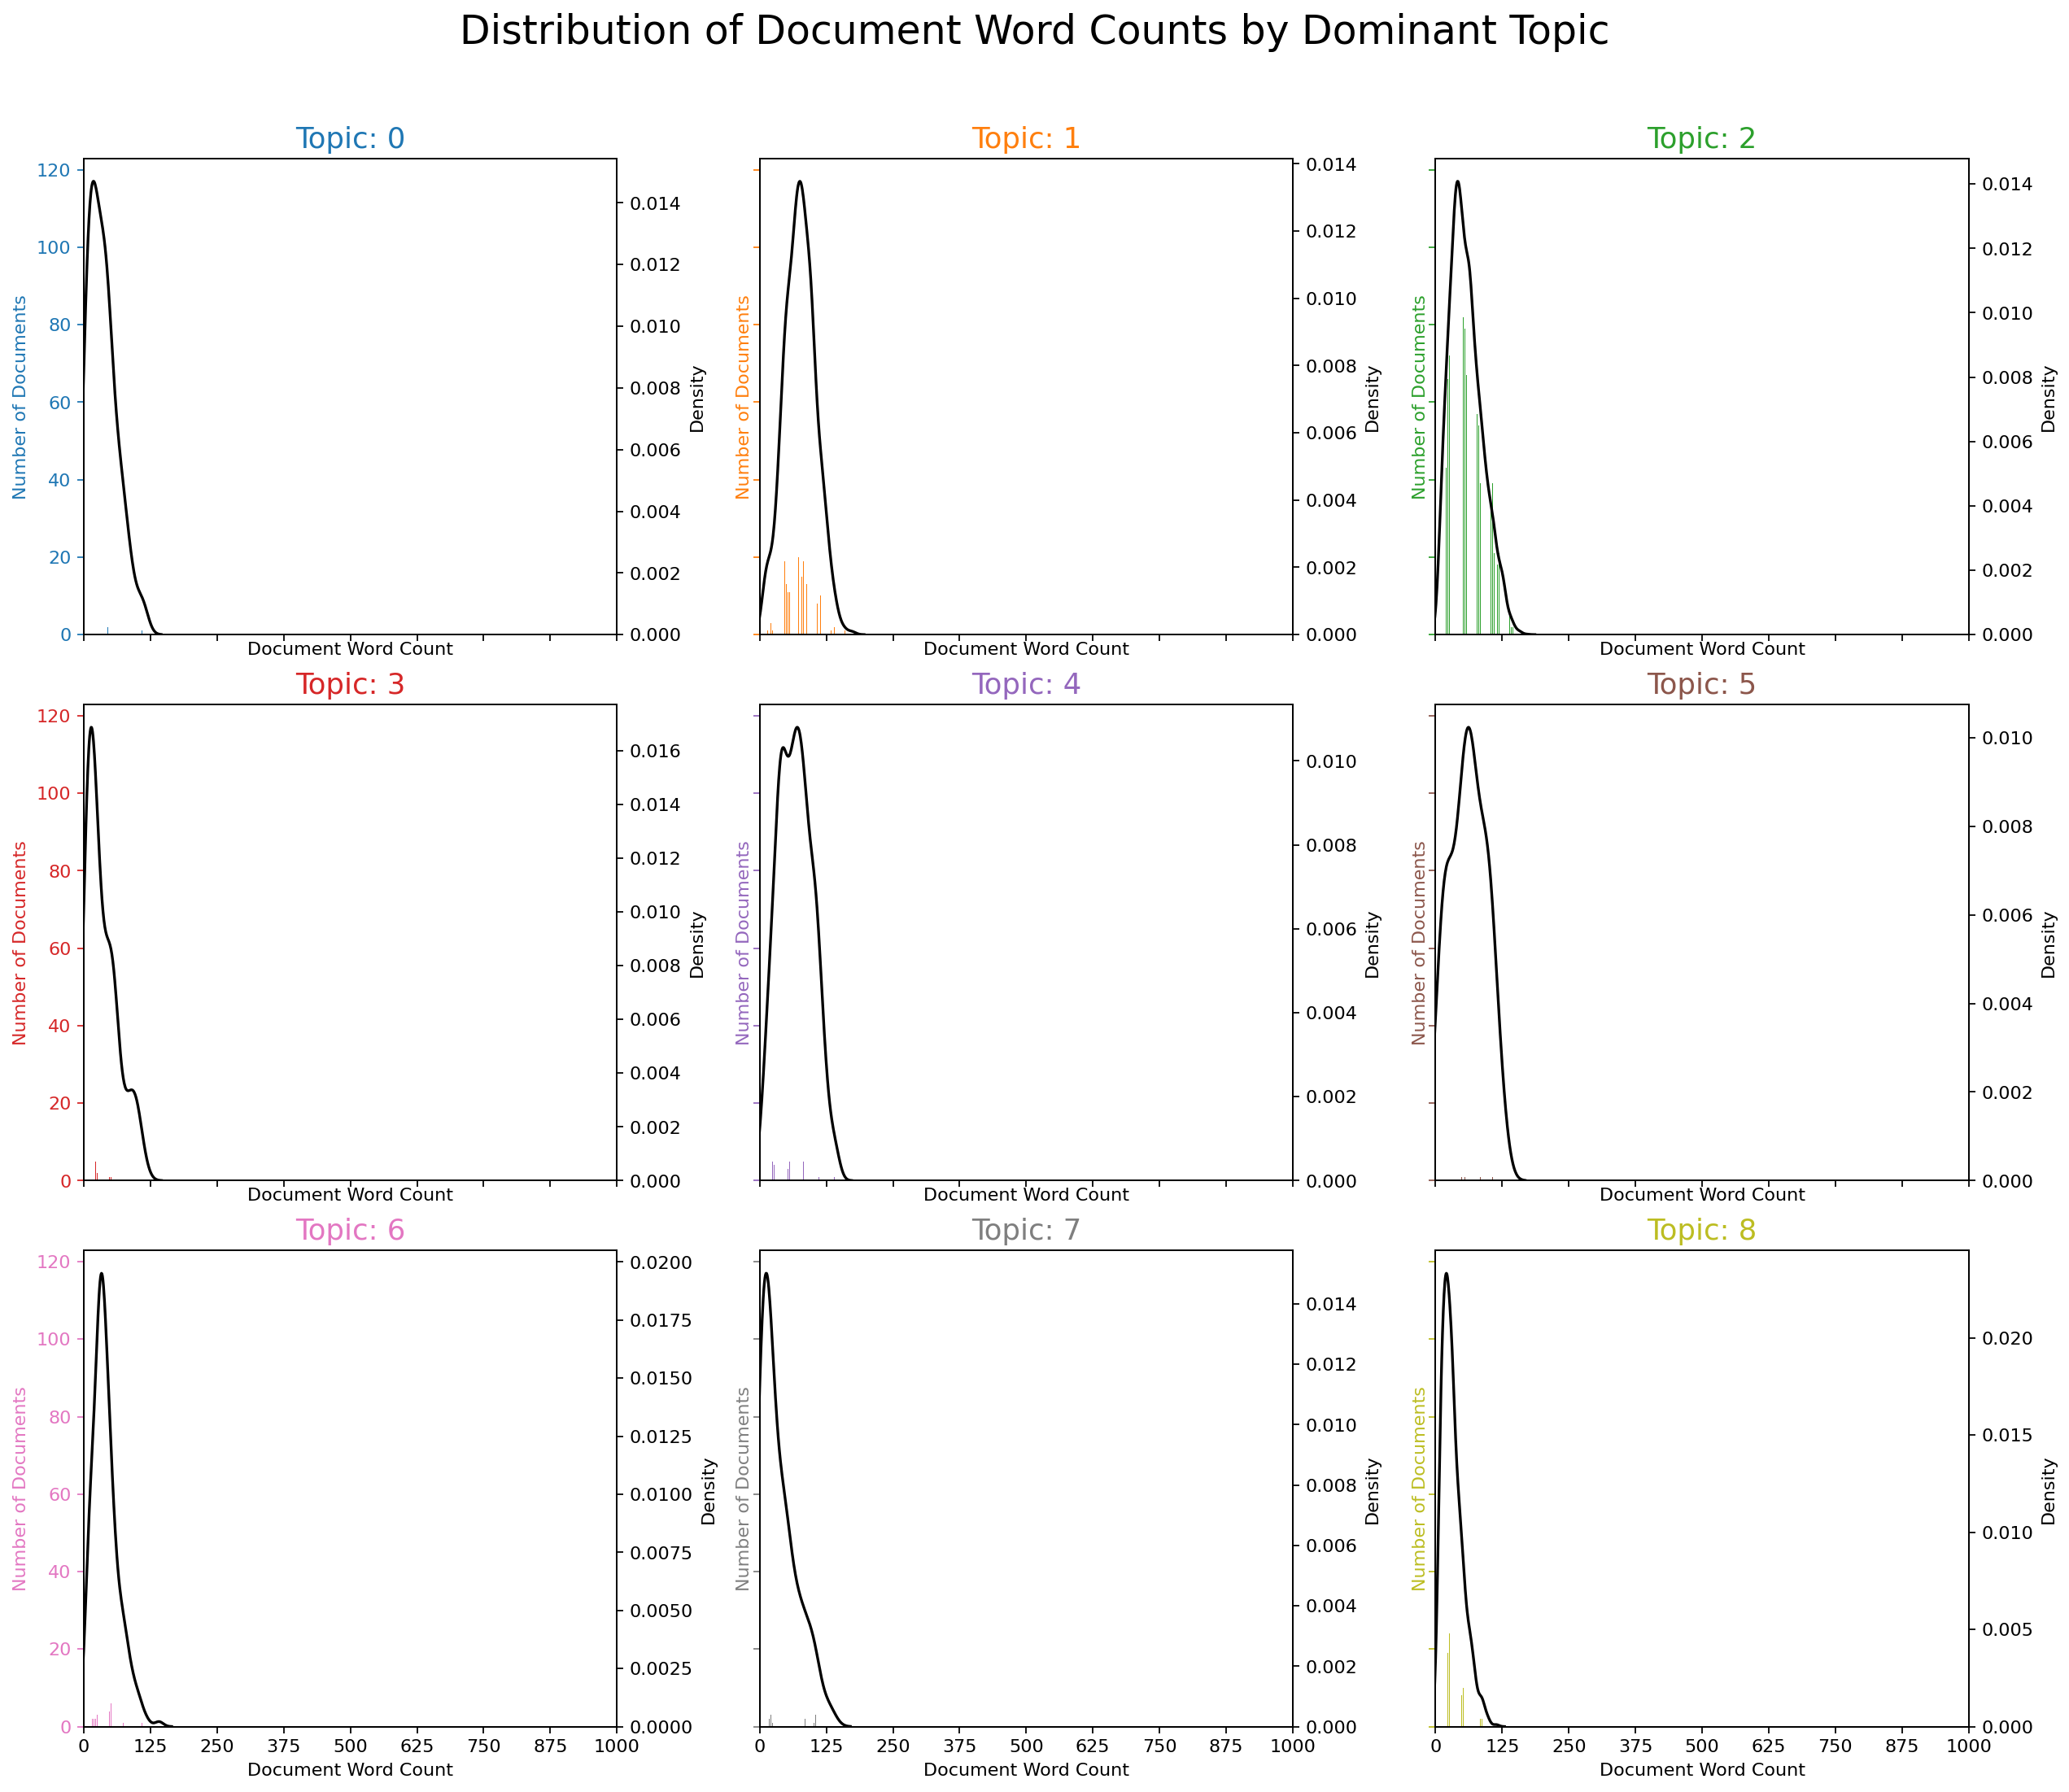

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,3,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

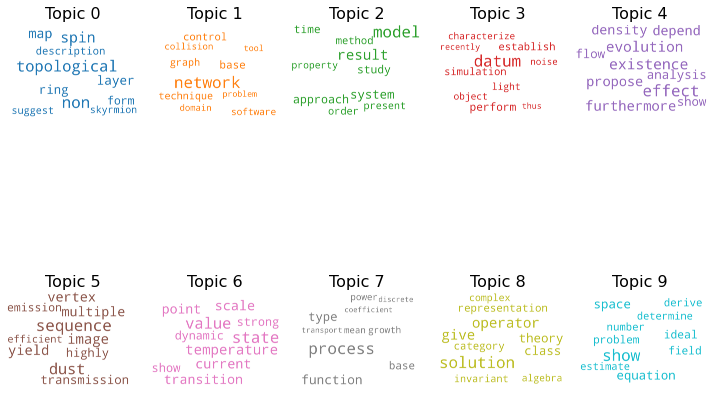

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4738 samples in 0.006s...
[t-SNE] Computed neighbors for 4738 samples in 0.326s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4738
[t-SNE] Computed conditional probabilities for sample 2000 / 4738
[t-SNE] Computed conditional probabilities for sample 3000 / 4738
[t-SNE] Computed conditional probabilities for sample 4000 / 4738
[t-SNE] Computed conditional probabilities for sample 4738 / 4738
[t-SNE] Mean sigma: 0.059049


/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.165779
[t-SNE] KL divergence after 1000 iterations: 1.484652


In [ ]:
# !pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word,mds='tsne')
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by defau

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2      32.420952   8.115230       1        1  30.059594
1       0.648955  71.707100       2        1  12.516946
4      71.019684   9.971006       3        1  10.854724
9       3.785981  33.185135       4        1   8.726201
3     -42.666500  -9.222070       5        1   7.426331
7      -3.621689 -43.526516       6        1   7.017762
6      -3.632402  -4.171708       7        1   6.904424
8     -36.584400  35.804413       8        1   6.894361
0      44.391380  50.615383       9        1   4.831257
5      40.235809 -31.591665      10        1   4.768401, topic_info=           Term         Freq        Total Category  logprob  loglift
1329    network  3376.000000  3376.000000  Default  30.0000  30.0000
720     process  2609.000000  2609.000000  Default  29.0000  29.0000
299        show  4087.000000  4087.000000  Default  28.0000  28.0000
504       datum  2319.000000  2319.000000  Default  27.0000  27.0000
31        model  6167.000000  6167.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
733       broad   205.150154   206.012634  Topic10  -4.9242   3.0390
739         sub   200.320410   201.182905  Topic10  -4.9480   3.0389
921   intrinsic   197.243291   198.105428  Topic10  -4.9635   3.0388
717     operate   195.403266   196.265905  Topic10  -4.9729   3.0388
6179      grasp   238.650327   253.000051  Topic10  -4.7729   2.9848

[401 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1910      2  0.999038    achieve
524       5  0.997779     action
2918      2  0.996817   activity
242       8  0.994682      admit
5389      2  0.997864  aggregate
...     ...       ...        ...
756       7  0.997434       wave
379       7  0.998692       weak
68        2  0.998642     weight
241       1  0.999325       well
740      10  0.998295      yield

[436 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 10, 4, 8, 7, 9, 1, 6])

In [ ]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

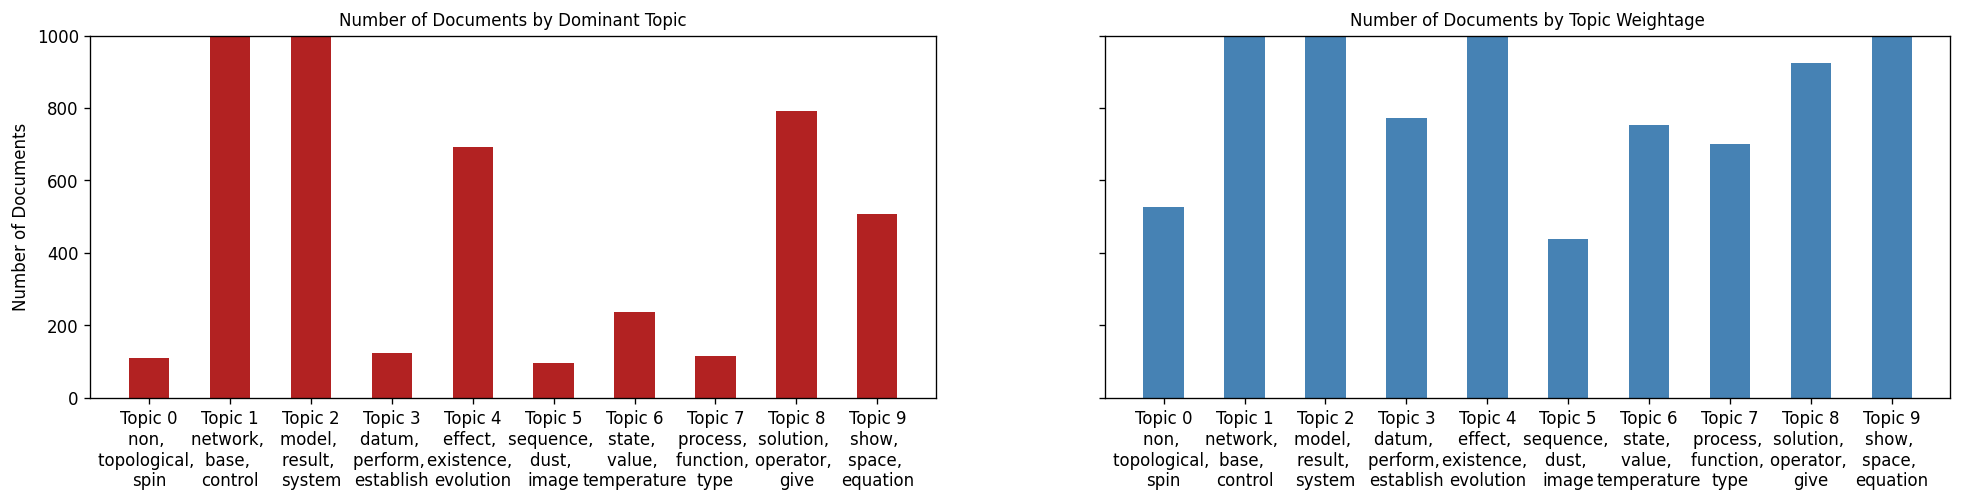

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()